# DrivenData
## Flu Vaccine Competition
### Benchmark project
Lifted from <a href = 'https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/'>here</a>.

### Loading the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_columns", 100)

In [7]:
features_path = 'C:/Users/Chloe.Dickinson/Documents/Python Scripts/Competitions/DrivenData/datasets/training_set_features.csv'
labels_path = "C:/Users/Chloe.Dickinson/Documents/Python Scripts/Competitions/DrivenData/datasets/training_set_labels.csv"

features_df = pd.read_csv(features_path, index_col = "respondent_id")
labels_df = pd.read_csv(labels_path, index_col = "respondent_id")

In [8]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [10]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [11]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


#### Double check the rows between features + labels match up

In [12]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

No response - this is good.

### Exploring the data

In [13]:
import matplotlib.pyplot as plt

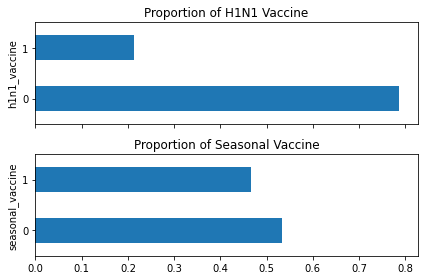

In [14]:
fig, ax = plt.subplots(2, 1, sharex = True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine']
 .value_counts()
 .div(n_obs)
 .plot.barh(title = "Proportion of H1N1 Vaccine", ax = ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(labels_df['seasonal_vaccine']
 .value_counts()
 .div(n_obs)
 .plot.barh(title = "Proportion of Seasonal Vaccine", ax = ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

~ 50 % of respondents received the seasonal vaccine, but ~ 20 % received H1N1 vaccine. 
Are these independent of one another?

In [18]:
cross_tab = pd.crosstab(
    labels_df['h1n1_vaccine'],
    labels_df['seasonal_vaccine'],
    margins = True,
    normalize = True
)
print(cross_tab)

seasonal_vaccine         0         1       All
h1n1_vaccine                                  
0                 0.497810  0.289737  0.787546
1                 0.036582  0.175871  0.212454
All               0.534392  0.465608  1.000000


A little more on crosstab <a href = 'https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b'>here</a>. on <a href = 'https://en.wikipedia.org/wiki/Phi_coefficient'>Phi coefficient</a>.

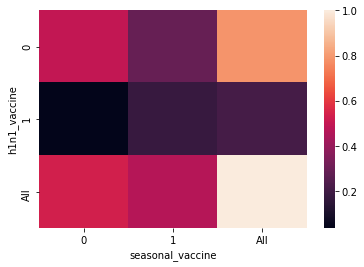

In [17]:
import seaborn as sns
sns.heatmap(cross_tab)
plt.show()

In [19]:
(labels_df['h1n1_vaccine']
    .corr(labels_df['seasonal_vaccine'], method = 'pearson')
)

0.37714265306144684

NB Pearson is equivalent to <a href = 'https://en.wikipedia.org/wiki/Phi_coefficient'>Phi coefficient</a> in this context. Phi coefficient of 0.37 indicates a moderate positive correlation.

### Features

In [20]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [21]:
#plot prototype
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
             .groupby(['h1n1_concern', 'h1n1_vaccine'])
             .size()
             .unstack('h1n1_vaccine'))
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


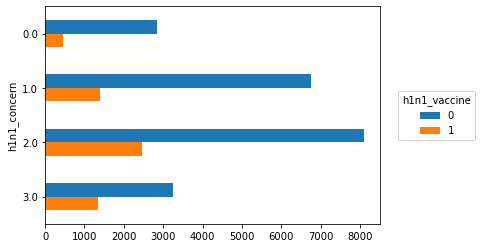

In [24]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc = 'center right',
         bbox_to_anchor = (1.3, 0.5),
         title = 'h1n1_vaccine')

In [25]:
h1n1_concern_counts = counts.sum(axis = 'columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [26]:
props = counts.div(h1n1_concern_counts, axis = 'index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


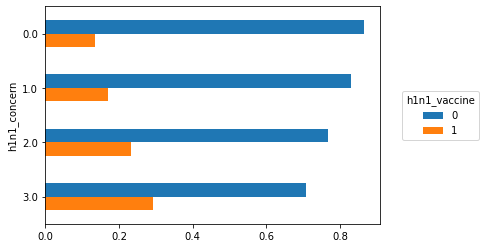

In [28]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(loc = 'center left',
             bbox_to_anchor = (1.05, 0.5),
             title = 'h1n1_vaccine')

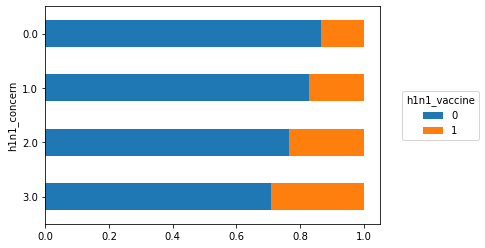

In [30]:
ax = props.plot.barh(stacked = True)
ax.invert_yaxis()
ax.legend(loc = 'center left',
             bbox_to_anchor = (1.05, 0.5),
             title = 'h1n1_vaccine')

Even if people are 3 / 'really concerned' about h1n1, only 29 % are getting vaccinated. As concern increases, more respondents get vaccinated.

In [31]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

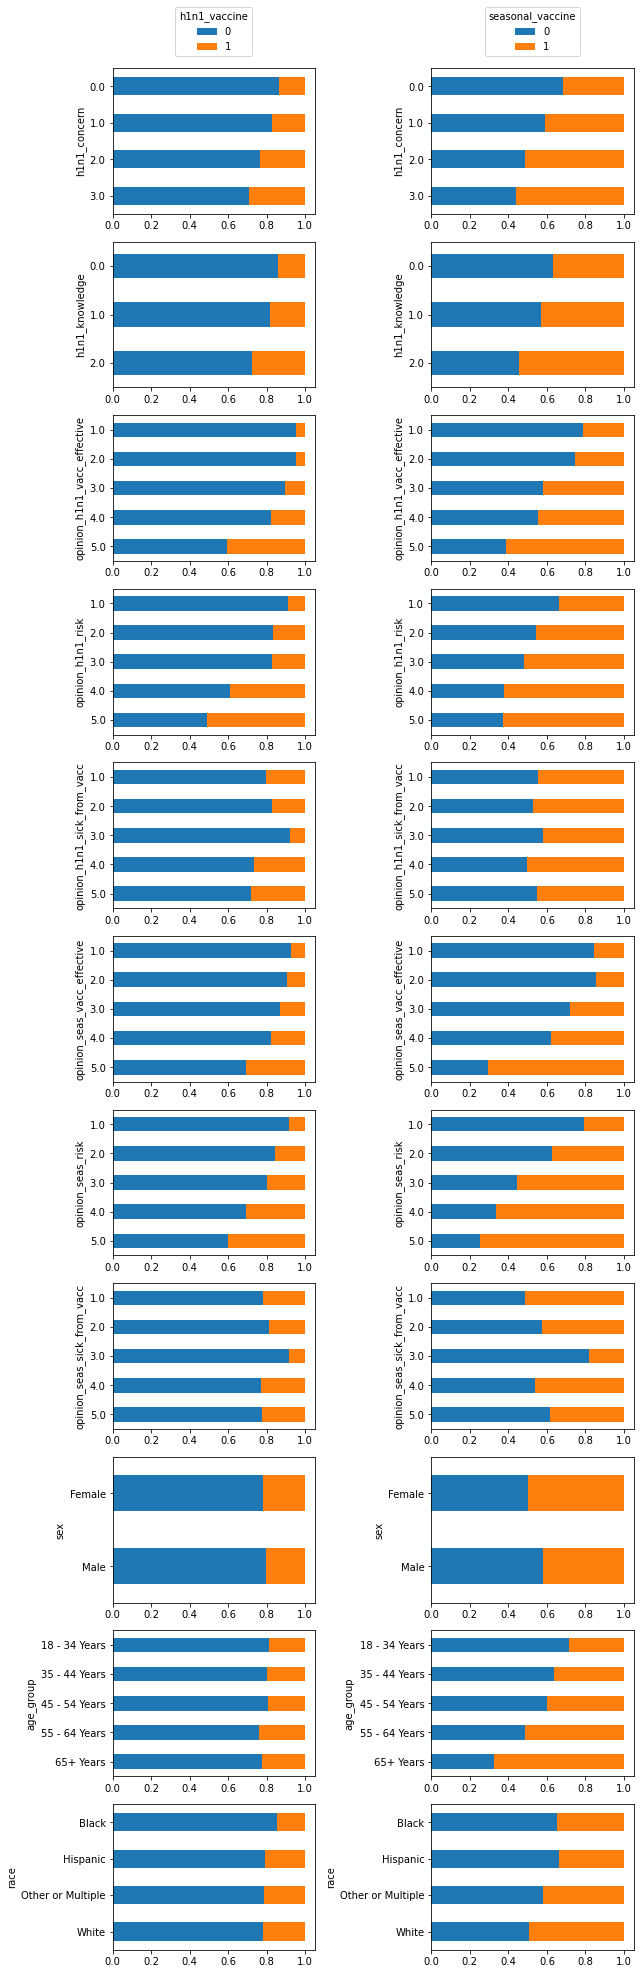

In [33]:
cols_to_plot = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 
                'opinion_seas_sick_from_vacc', 'sex', 'age_group', 'race']

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize = (9, len(cols_to_plot)*2.5))

for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', joined_df, ax = ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1])
    
ax[0,0].legend(loc = 'lower center',
                  bbox_to_anchor = (0.5, 1.05), title = 'h1n1_vaccine')
ax[0,1].legend(loc = 'lower center',
                  bbox_to_anchor = (0.5, 1.05), title = 'seasonal_vaccine')

fig.tight_layout()

### Building some models

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 88

In [35]:
features_df.dtypes != 'object'

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [36]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


#### Preprocessing

- Scaling - StandardScaler / Z-score scaling
- NA Imputation - LogReg does not accept NA, use median imputation

Also build a pipeline, this is best practice for ML models and makes it easy to reuse the model on new data.

In [37]:
#preprocessing into a pipeline object
numeric_preprocessing_steps = Pipeline([('standard_scaler', StandardScaler()),
                                           ('simple_imputer', SimpleImputer(strategy = 'median'))])

preprocessor = ColumnTransformer(
    transformers = [('numeric', numeric_preprocessing_steps, numeric_cols)],
    remainder = 'drop'
)

sklearn's default hyperparameters will be used - L2/Ridge regularisation and C value = 1.
Regularisation reduces <a ahref = 'https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a'>overfitting<a>.

In [47]:
#two outputs - so use MultiOPutputClassifier.
estimators = MultiOutputClassifier(
    estimator = LogisticRegression(penalty = 'l2', C = 1))

#### Pipeline

In [48]:
full_pipeline = Pipeline(
    [('preprocessor', preprocessor),
    ('estimators', estimators)])

In [49]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'househo

#### Training and Evaluation

Split the data into train and test sets. Remember, the h1n1_vaccine label classes were a little imbalanced, which may lead to lopsided splits, which can lead to generalisation problems with fitting or evaluating the model. We should have a large enough dataset that a randomly shuffled split should keep the same proportions, but we can use stratify argument to enforce even splits.

In [50]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [51]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

[array([[0.89845005, 0.10154995],
        [0.95644727, 0.04355273],
        [0.90550179, 0.09449821],
        ...,
        [0.90688221, 0.09311779],
        [0.46632356, 0.53367644],
        [0.84678311, 0.15321689]]),
 array([[0.90765766, 0.09234234],
        [0.79392626, 0.20607374],
        [0.04217459, 0.95782541],
        ...,
        [0.78541403, 0.21458597],
        [0.338459  , 0.661541  ],
        [0.7090025 , 0.2909975 ]])]

In [54]:
print('preds[0].shape', preds[0].shape)
print('preds[1].shape', preds[1].shape)

preds[0].shape (8814, 2)
preds[1].shape (8814, 2)


First array is for h1n1_vaccine, second is for seasonal_vaccine.
Two columns are for class 0 and class 1 respectively.
Create a dataframe of the second column of each array.

In [57]:
y_preds = pd.DataFrame(
    {'h1n1_vaccine': preds[0][:, 1],
    'seasonal_vaccine': preds[1][:, 1]},
    index = y_eval.index
)
print('y_preds.shape', y_preds.shape)
y_preds.head()

y_preds.shape (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
1028,0.101550,0.092342
1251,0.043553,0.206074
712,0.094498,0.957825
10165,0.185524,0.244513
26647,0.048715,0.135895


the competition uses <a href = 'https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5'>ROC AUC</a> as the metric. we have to make the plot ourselves.

In [58]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

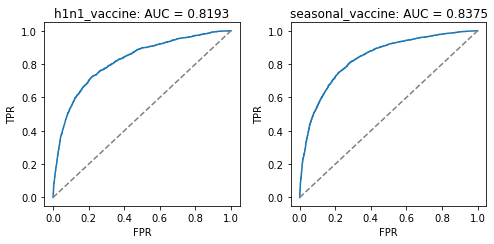

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

AUC  of 0.5 is no better than random while 1.0 is a perfect model. 0.83 is not great but not bad.
Competition metric is the average of these two AUC values. scikit-learn roc_auc_score supports multilabel, so we can use it directly.

In [60]:
roc_auc_score(y_eval, y_preds)

0.82841756241878

####  Retrain model on whole dataset

In [62]:
full_pipeline.fit(features_df, labels_df)
None #prevents the pipeline being printed

## Generating predicitons for the test set

In [63]:
test_features_df = pd.read_csv('C:/Users/Chloe.Dickinson/Documents/Python Scripts/Competitions/DrivenData/datasets/test_set_features.csv',
                              index_col = 'respondent_id')

In [64]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.87280333, 0.12719667],
        [0.94475602, 0.05524398],
        [0.62906951, 0.37093049],
        ...,
        [0.80411015, 0.19588985],
        [0.9492446 , 0.0507554 ],
        [0.38421362, 0.61578638]]),
 array([[0.57359831, 0.42640169],
        [0.92876678, 0.07123322],
        [0.3626162 , 0.6373838 ],
        ...,
        [0.59872448, 0.40127552],
        [0.68003071, 0.31996929],
        [0.35787941, 0.64212059]])]

In [65]:
submission_df = pd.read_csv('C:/Users/Chloe.Dickinson/Documents/Python Scripts/Competitions/DrivenData/datasets/submission_format.csv',
                           index_col = 'respondent_id')

In [66]:
np.testing.assert_array_equal(test_features_df.index.values,
                             submission_df.index.values)

In [67]:
submission_df['h1n1_vaccine'] = test_probas[0][:, 1]
submission_df['seasonal_vaccine'] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.127197,0.426402
26708,0.055244,0.071233
26709,0.370930,0.637384
26710,0.464351,0.803446
26711,0.286673,0.634903


In [68]:
submission_df.to_csv('my_submission.csv', index=True)